3000
costF :  0.012321710553224641
theta :  [[ 0.98406903 -0.02556541 -0.00278538 -0.01092711 -0.07444266  0.00104447
  -0.02065981 -0.00722242]]
epoch :  3000
-1
실제 1등마 :  [0, 12, 23, 33, 37, 48, 59, 70, 73, 82, 92, 102, 106, 117, 126, 136, 142, 152, 160, 169, 175, 185, 196]
예측 1등마 [0, 12, 24, 33, 38, 49, 59, 70, 73, 89, 92, 102, 109, 119, 126, 138, 142, 155, 164, 169, 175, 185, 196]
정확도 :  0.6086956521739131


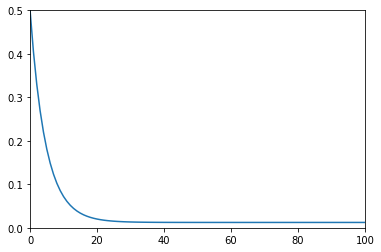

['실제값' '예측값' '오차율']
[[63.5 64.5  1.6]
 [63.8 64.7  1.3]
 [64.1 65.3  1.8]
 [64.3 65.7  2.2]
 [64.4 65.5  1.7]
 [65.1 66.   1.4]
 [65.2 66.5  1.9]
 [65.6 65.9  0.5]
 [65.6 66.2  0.9]
 [66.3 66.1  0.3]
 [66.8 66.2  0.9]
 [67.2 66.1  1.6]
 [62.5 63.4  1.4]
 [63.7 65.1  2.3]
 [63.8 65.8  3.2]
 [64.1 66.1  3.2]
 [64.5 65.7  1.9]
 [64.5 66.   2.4]
 [64.6 65.6  1.6]
 [64.7 65.9  1.9]
 [64.9 65.7  1.3]
 [64.9 65.1  0.3]
 [65.4 65.1  0.5]
 [63.2 65.3  3.3]
 [63.3 64.8  2.3]
 [63.6 65.   2.2]
 [64.  65.6  2.4]
 [64.2 65.8  2.5]
 [64.6 65.2  1. ]
 [64.9 66.2  2. ]
 [65.1 66.3  1.8]
 [65.8 66.3  0.7]
 [66.2 66.3  0.2]
 [62.9 63.3  0.7]
 [63.4 63.8  0.6]
 [63.5 65.6  3.3]
 [64.3 65.4  1.6]
 [61.9 64.1  3.6]
 [62.  63.   1.7]
 [62.3 63.3  1.5]
 [62.8 63.1  0.5]
 [63.4 65.1  2.7]
 [63.6 65.8  3.4]
 [64.4 66.4  3.1]
 [64.5 65.7  1.9]
 [64.6 65.8  1.9]
 [64.7 66.   2. ]
 [64.7 65.3  0.9]
 [62.6 64.   2.2]
 [63.  63.4  0.7]
 [63.4 64.7  2.1]
 [64.5 64.2  0.5]
 [64.5 65.1  1. ]
 [64.9 65.8  1.4]
 [64.9 6

In [18]:
import requests
import numpy as np
import math
import matplotlib.pyplot as plt

class ML:
  LearnRate = 0.1
  n = 8
  m = 1000
  epoch = 0
  costFarr = []

  theta = np.zeros(n)
  theta = theta.reshape(1,n)
  x_train = np.array
  y_train = np.array
  x_test = np.array
  y_test = np.array

  def __init__(self, x_train, y_train, y_train1, x_test, y_test):
    self.x_train = x_train
    self.y_train = y_train
    self.y_train1 = y_train1
    self.x_test = x_test
    self.y_test = y_test

  def LineReg(this):
    hypoF = np.sum(this.theta * this.x_train, axis = 1)
    hypoF = hypoF.reshape(this.m,1)
    costF = np.sum((hypoF - this.y_train) ** 2 / (this.m * 2))

    gradient = np.zeros(this.n)

    for i in range(this.n):
      temp = this.x_train[:,i]
      temp = temp.reshape(this.m,1)
      gradient[i] = np.sum((hypoF - this.y_train) * temp) / this.m

    gradient = gradient.reshape(1,this.n)
    this.theta -= this.LearnRate * gradient

    this.epoch += 1

    this.costFarr.append(costF)

  def printAll(this):
    print('costF : ', this.costFarr[-1])
    print('theta : ', this.theta)
    print('epoch : ', this.epoch)

  def test(this):
    result = np.sum(this.theta * this.x_test, axis = 1)
    result = result.reshape(200,1)
    mean = np.sum(this.y_train1) / 1000
    var = np.sum(this.y_train1**2) / 1000
    var -= mean ** 2
    var = math.sqrt(var)
    result *= var
    result += mean
    temp = [0]
    for i in range(199):
      if this.y_test[i][0] > this.y_test[i+1][0] or this.y_test[i+1][0]-this.y_test[i][0] > 5:
        temp.append(i+1)
    print('실제 1등마 : ' , temp)
    j=0
    temp2 = []
    for i in temp:
      if i == 0:
        continue
      temp2.append(j + np.argmin(result[j:i,:]))
      j = i
    temp2.append(j + np.argmin(result[j:,:]))
    print('예측 1등마', temp2)
    j=0
    for i in range(len(temp)):
      if temp[i] == temp2[i]:
        j += 1
    print('정확도 : ', j/ len(temp))
    plt.plot(np.array(this.costFarr))
    plt.axis([0,100,0.0,0.5])
    plt.show()
    rs = np.concatenate((this.y_test,result),axis=1)
    er = np.abs((this.y_test - result)*100 / this.y_test)
    rs = np.concatenate((rs, er),axis=1)
    print(np.array(['실제값', '예측값', '오차율']))
    print(np.round(rs,1))
    print('평균오차율 : ' ,round(np.sum(er)/200 , 2))

train_data = np.loadtxt('./train2.csv',delimiter=',')
train_data = np.delete(train_data,0, axis = 0)
x_train = np.delete(train_data,0,axis = 1)
y_train = np.delete(train_data,(1,2,3,4,5,6,7,8),axis = 1)
test_data = np.loadtxt('./test2.csv',delimiter=',')
test_data = np.delete(test_data,(0),axis=0)
x_test = np.delete(test_data,0,axis = 1)
y_test = np.delete(test_data,(1,2,3,4,5,6,7,8),axis = 1)
x_train = x_train.astype(np.float64)
y_train = y_train.astype(np.float64)
x_test = x_test.astype(np.float64)
y_test = y_test.astype(np.float64)
y_train1 = y_train
mean = np.sum(y_train, axis = 0) / 1000
dev = np.sum(y_train**2/1000, axis = 0)
dev = np.sqrt(dev - mean**2)
y_train = (y_train - mean) / dev

ML_LR = ML(x_train, y_train, y_train1, x_test, y_test)

while 1:
  time = int(input())
  if time == -1:
    break
  for i in range(time):
    ML_LR.LineReg()
  ML_LR.printAll()
ML_LR.test()

In [4]:
cd ./drive/MyDrive/AI_project

/content/drive/MyDrive/AI_project


In [2]:
pwd

'/content'